In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [3]:
import os

In [4]:
ceip_filepath = os.path.join("..", "..", "data", "df_ceip.csv")

In [5]:
df = pd.read_csv(ceip_filepath, encoding="utf-8")

In [6]:
df.head()

,id,fecha_dato,fecha_inscripcion,anio_lectivo,cod_departamento_escuela,numero_escuela,cod_grado_escolar,cod_nivel_educ,cod_evaluacion_final,cod_motivo_repeticion,cod_concepto_final_rend,cod_concepto_final_cond,cantidad_inasist_justif,cod_departamento,nro_escuela,desc_escuela,cod_area_escuela,desc_area_escuela
0,6609F099B4243A088C36911A256DCE39,2017-12-01,2017-02-13,2017,15,120,2,P,1.0,1.0,8.0,8.0,NaN,15.0,120.0,Escuela Nro. 120 de SALTO,C,Común
1,6D0DBFF06B8F478EBD5C47B24409F4DA,2018-12-01,2018-02-02,2018,8,28,1,P,1.0,-1.0,8.0,7.0,NaN,8.0,28.0,DR. LEONEL AGUIRRE,C,Común
2,479307C7395E18AA8B98675888E7E27D,2021-12-01,2021-02-01,2021,17,1,5,P,1.0,1.0,5.0,7.0,NaN,17.0,1.0,JOSE PEDRO VARELA,C,Común
3,566FBE5AA4BA9FC72DF50B3AFBD98E45,2017-12-01,2017-02-13,2017,4,2,6,P,1.0,1.0,5.0,5.0,NaN,4.0,2.0,JOSE PEDRO VARELA,C,Común
4,CB33A03B5498C11E7A7071C4AADCF2EC,2022-12-01,2022-03-07,2022,10,93,3,P,1.0,1.0,9.0,8.0,NaN,10.0,93.0,Escuela Nro. 93 de MALDONADO,C,Común


In [7]:
# Ver dtypes y corregir en caso de ser necesario
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015145 entries, 0 to 3015144
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        object 
 1   fecha_dato                object 
 2   fecha_inscripcion         object 
 3   anio_lectivo              int64  
 4   cod_departamento_escuela  int64  
 5   numero_escuela            int64  
 6   cod_grado_escolar         object 
 7   cod_nivel_educ            object 
 8   cod_evaluacion_final      float64
 9   cod_motivo_repeticion     float64
 10  cod_concepto_final_rend   float64
 11  cod_concepto_final_cond   float64
 12  cantidad_inasist_justif   float64
 13  cod_departamento          float64
 14  nro_escuela               float64
 15  desc_escuela              object 
 16  cod_area_escuela          object 
 17  desc_area_escuela         object 
dtypes: float64(7), int64(3), object(8)
memory usage: 414.1+ MB


In [8]:
df = df.astype(
    {
        "id":"string",
        "fecha_dato":"datetime64[ns]",
        "anio_lectivo": "int8",
        "cod_departamento_escuela":"string",
        "numero_escuela":"string",
        "cod_grado_escolar":"string",
        "cod_nivel_educ":"category",
        "cod_evaluacion_final":"category",
        "cod_motivo_repeticion":"category",
        "cod_concepto_final_rend":"category",
        "cod_concepto_final_cond":"category",
        "cantidad_inasist_justif":"category",
        "cod_departamento":"category",
        "nro_escuela":"string",
        "desc_escuela":"string",
        "cod_area_escuela":"category",
        "desc_area_escuela":"string",
    }
)

In [9]:
df.isnull().sum().to_frame(name="null_count").reset_index(names="column").combine_first(
    df.isna().sum().to_frame(name="na_count").reset_index(names="column")
)

,column,na_count,null_count
0,id,2209,2209
1,fecha_dato,0,0
2,fecha_inscripcion,5,5
3,anio_lectivo,0,0
4,cod_departamento_escuela,0,0
5,numero_escuela,0,0
6,cod_grado_escolar,0,0
7,cod_nivel_educ,0,0
8,cod_evaluacion_final,33734,33734
9,cod_motivo_repeticion,33734,33734


In [10]:
df = df.drop("cantidad_inasist_justif",axis=1)

In [25]:
df = df.drop("id", axis=1)

In [41]:
df["fecha_inscripcion"].replace(np.nan, "11").str.startswith("11")

0          False
1          False
2          False
3          False
4          False
           ...  
3015140    False
3015141    False
3015142    False
3015143    False
3015144    False
Name: fecha_inscripcion, Length: 3015145, dtype: bool

In [46]:
df = df[~df["fecha_inscripcion"].replace(np.nan, "11").str.startswith("11")].astype({"fecha_inscripcion":"datetime64[ns]"})

In [12]:
import ppscore as pps

In [57]:
pps_mat = pps.matrix(df.drop(["fecha_dato", "fecha_inscripcion"], axis=1))

C:\Users\Gonzaa\anaconda3\envs\utec\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Gonzaa\anaconda3\envs\utec\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Gonzaa\anaconda3\envs\utec\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Gonzaa\anaconda3\envs\utec\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Gonzaa\anaconda3\envs\utec\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_sp

In [58]:
pps_mat

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,anio_lectivo,anio_lectivo,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,anio_lectivo,cod_departamento_escuela,1.231954e-07,classification,True,weighted F1,0.156688,0.156688,DecisionTreeClassifier()
2,anio_lectivo,numero_escuela,0.000000e+00,classification,True,weighted F1,0.005000,0.002377,DecisionTreeClassifier()
3,anio_lectivo,cod_grado_escolar,0.000000e+00,classification,True,weighted F1,0.112000,0.083921,DecisionTreeClassifier()
4,anio_lectivo,cod_nivel_educ,1.603133e-07,classification,True,weighted F1,0.612875,0.612875,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
191,desc_area_escuela,cod_departamento,8.278648e-05,classification,True,weighted F1,0.153451,0.153521,DecisionTreeClassifier()
192,desc_area_escuela,nro_escuela,0.000000e+00,classification,True,weighted F1,0.004400,0.002287,DecisionTreeClassifier()
193,desc_area_escuela,desc_escuela,0.000000e+00,classification,True,weighted F1,0.002000,0.001351,DecisionTreeClassifier()
194,desc_area_escuela,cod_area_escuela,1.000000e+00,classification,True,weighted F1,0.819244,1.000000,DecisionTreeClassifier()


In [61]:
matrix_df = pps_mat[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

<Axes: xlabel='x', ylabel='y'>

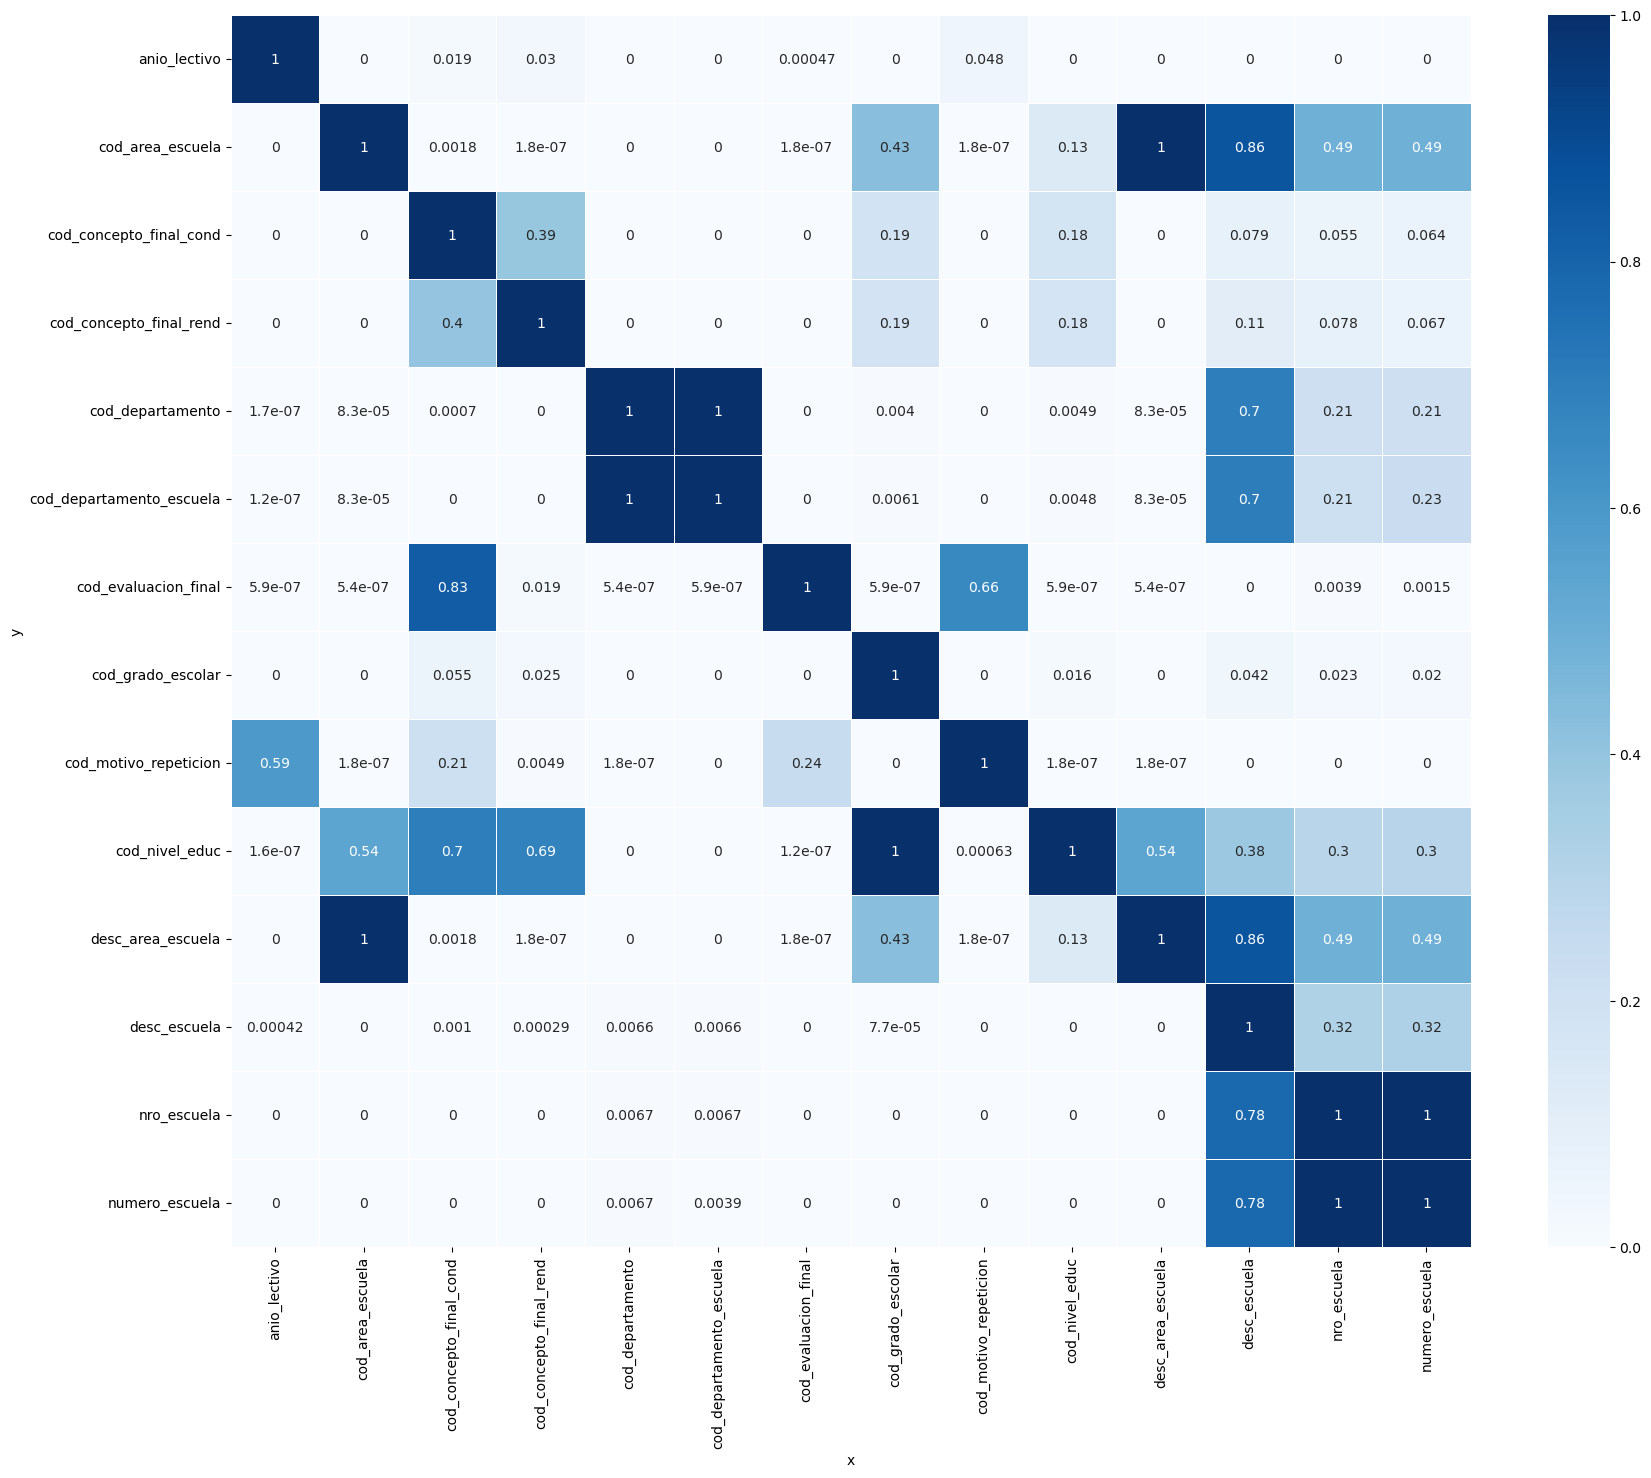

In [64]:
plt.figure(figsize=(20,16))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [70]:
pps_mat[(pps_mat["ppscore"] > 0.1) & (pps_mat["y"] == "cod_evaluacion_final")]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
75,cod_evaluacion_final,cod_evaluacion_final,1.000000,predict_itself,True,None,0.000000,1.000000,None
89,cod_motivo_repeticion,cod_evaluacion_final,0.659165,classification,True,weighted F1,0.946034,0.981606,DecisionTreeClassifier()
117,cod_concepto_final_cond,cod_evaluacion_final,0.828791,classification,True,weighted F1,0.946034,0.990761,DecisionTreeClassifier()
